# Assignment 5: Neural Networks

Due: November 6th at 11:59pm

**Namita Kharat**

## Exploring neural networks for digit classification 

In this assignment you will explore classification of handwritten digits with neural networks. For that task, we will use part of the MNIST dataset, which is very commonly used in the machine learning community. Your task is to explore various aspects of multi-layer neural networks using this dataset. We have prepared a [small subset](http://www.cs.colostate.edu/~cs545/fall16/lib/exe/fetch.php?media=assignments:mnist.tar.gz) of the data with a given split into training and test data.

1. Plot network accuracy as a function of the number of hidden units for a single-layer network with a logistic activation function. Try to find a range of values where the network displays both under-fitting and over-fitting.  For a fixed architecture, explore accuracy as a function of the number of epochs used for training as well as the learning rate.
2. Plot network accuracy as a function of the number of hidden units for a two-layer network with a logistic activation function, similarly to part 1 using a specific value of the learning rate and number of epochs. Does this dataset benefit from the use of more than one layer?
3.  Add weight decay regularization to the neural network class (explain in your report how you did it). Does the network demonstrate less over-fitting on this dataset with the addition of weight decay?
4. Modify the code to include the option of using the cross-entropy loss function instead of the quadratic loss function.  Run experiments and determine which activation function works best with the cross-entropy (consider logistic and ReLU activations for the hidden layers).  Explain in your writeup the required changes in the code.
5. The code provided performs batch gradient descent.  Modify the code to perform stochastic gradient descent.  Explain in your report the change you made, and compare the performance of the resulting network in terms of accuracy and training time.
6. The provided implementation uses the same activation function in each layer. For solving regression problems we need to use a linear activation function to produce the output of the network. Explain why, and what changes need to be made in the code.


## Answers

**1.** I have used learning rate=10 for 1st two plots as I got high accuracy for that learning rate in the 3rd plot. 
The plot of accuracy vs number of hidden units with learning rate=10 and iterations=2000 
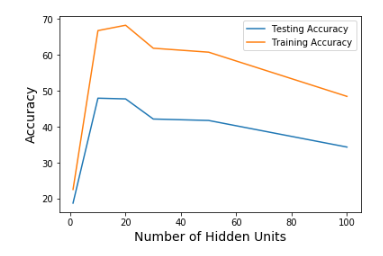
We can observe underfitting for number of hidden units = 1 as both the training and testing accurcy is less. The testing accuracy is maximum for 20 hidden units and then starts decreasing for increase in number of hidden units. We cannot observe overfitting as there is hardly a difference of 15% between training and testing accuracy. We might observe over-fitting for more number of hidden units.

The plot of accuracy vs number of epochs with learning rate = 10 and hidden unit=20
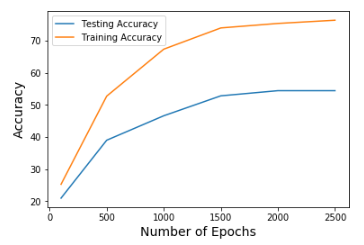
Under fitting is observed for number of epochs=100 and both the training and testing accuracy increases with the increase in number of epochs. However, overfitting is not observed.

The plot of accuracy vs learning rate with hidden units=20 and number of epochs=2000
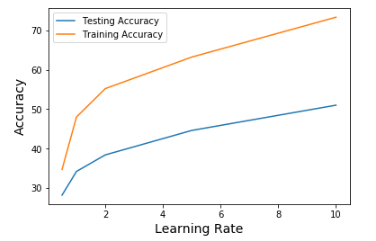
Under fitting can be observed for learning rate= 0.5 and the accuracy increases with the increase in learning rate. Overfitting is not observed.

**2.** The plot for accuracy vs number of hidden units with learning rate=10 and number of epochs=2000
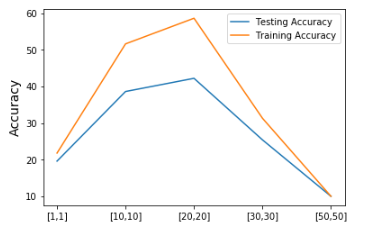

We can observe lowest accuracy at hidden units=[50,50]. The accuracy increases and reaches maximum value for hidden units=[20,20] and then decreases with increase in hidden units in each layer. On comparing the results with part 1, the dataset does not benefit from the use of more than one layer instead the accuracy decreases with addition of one more layer.

**3.** The weight decay regularization parameter ($\lambda$) is as follows:
$$w_i \gets w_i - \eta \frac{\partial E}{\partial w_i} - \eta \lambda w_i$$
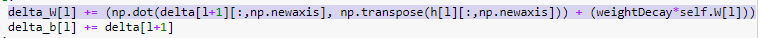

I have made the above changes to delta_W[l] in the fit function of the code, initialized a default weightDecay=0 parameter in the fit function and passed different values of weight decay regularization parameter through function call. The following is a plot of accuracy vs weight decay for different weight decay which shows less difference in training accuracy and testing accuracy as compared to part 1.
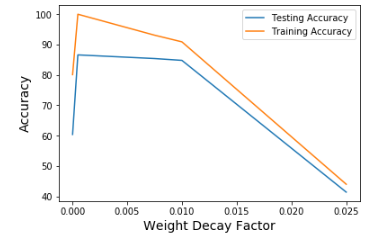

If `lambda` is increased, then weight W[l] nearly tends to zero. Hence, z=W.X+b also tends to zero. This can lead to disappearance of neuron in a layer and this zero propagates backward in the network making more neurons null which leads to a simpler network. Thus, we observe that the difference in training and test accuracy is comparatively less than that in part 1 on this dataset with the addition of weight decay. However, we need to be careful while choosing the regularization parameter as larger values would make network more simpler which might lead to underfitting.

**4.** I have made following changes to the code for cross entropy:
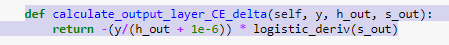
I have added the above code to the class to calculate output layer delta function with the formula for cross entropy and also kept logistic derivative for relu as well since we do not apply relu function in the output layer. The following change has been done in the fit function just before calculating the average cost.


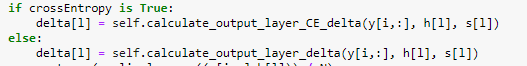

I have also added the following piece of code in the _init_ function:

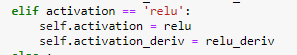



where the relu_deriv is defined as
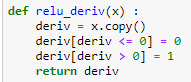
I have also used Xavier's weight initialization(in which we initialize weights in such a way that the variance remains same for x and y) to increase accuracy and make the model learn since with normal weight initialization, accuracies for both logistic and relu were as low as 15%. The following change has been made to the initialize_weights function. 

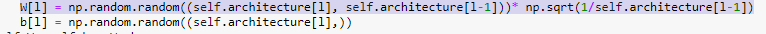

For cross entropy, I got following results where ReLU activation function works best (for hidden units=30, iterations=3000 and learning rate=10) for most of the runs.
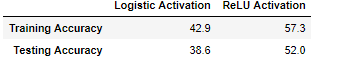
On plotting accuracy vs number of hidden units(with learning rate=10 and iterations=2000) for logistic and ReLU function, we get the following graph where the testing accuracy for ReLU with hidden units 10, 30 and 40  is more than that for logistic.

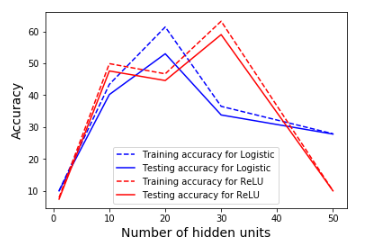

**5.** For stochastic gradient descent, I have added following changes in the fit function after calculating delta for hidden layer:
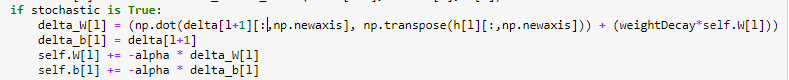

where, stochastic is a parameter passed to fit function which is set to False as default for batch gradient and true is passed for stochastic.

Also, for every iteration, we are shuffling the data as follows:
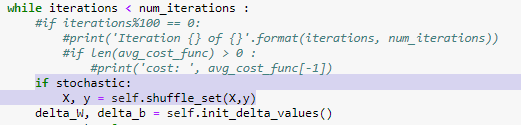

The shuffle_set function is defined (in the Neural Network class) as follows:
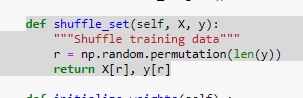

Following is a plot of accuracy vs number of epochs and time taken vs number of epochs for batch and stochastic gradient descent.
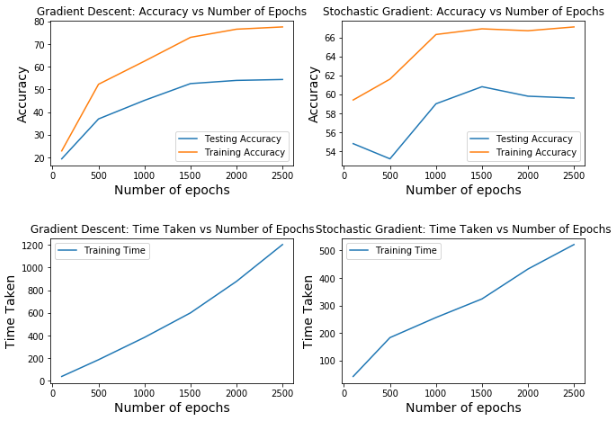

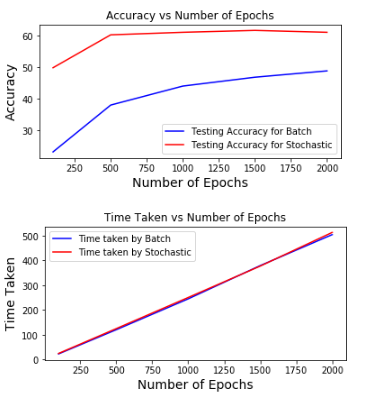

From the plots, we can observe that accuracy for stochastic gradient descent is greater than that of batch gradient descent. The time taken by stochastic is comparatively same or less than that taken by batch gradient descent as batch gradient computes the gradient using the whole dataset(takes longer for large number of training samples) whereas stochastic computes the gradient using a single sample. If Xavier's initialisation is used, we get following graph where testing accuracy for batch gradient descent is more than that of stochastic gradient descent.
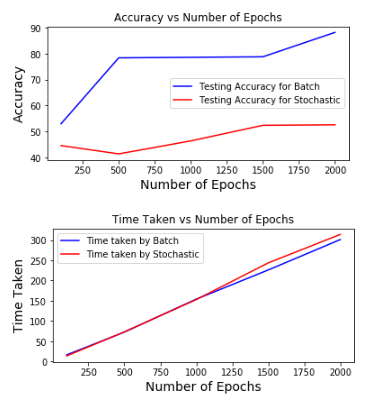

**6.** For solving regression problems, we need to add following activation function and its derivative function:
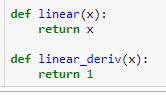
The derivative for a linear function is always one. Since, a neural network performing regression should have one output node. Therefore, substituting this derivative function in the code below results in single output.

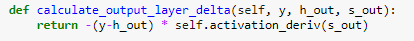
We can use non-linear activation function in hidden layers and a linear activation in output layer.
Also, we need to make changes in the predict function as well. We need to remove np.argmax as we do not need to check which class has more value. We know that regression is a maximum likelihood problem, we need probabilities. Thus, the new predict function is shown below.

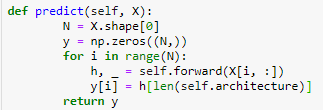

## Import Libraries

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
plt.rcParams['axes.labelsize'] = 14

## Read Data

In [79]:
def readData():
    trainData=np.loadtxt("MNIST_train.csv", delimiter=",")
    testData=np.loadtxt("MNIST_test.csv", delimiter=",")
    trainLabels=np.loadtxt("MNIST_train_labels.csv")
    testLabels=np.loadtxt("MNIST_test_labels.csv")
    return trainData,testData,trainLabels,testLabels

def standardizingData():
    trainData,testData,trainLabels,testLabels = readData()
    X_scale = StandardScaler()
    standardized_trainData = X_scale.fit_transform(trainData)
    standardized_testData = X_scale.fit_transform(testData)
    return standardized_trainData,standardized_testData,trainLabels,testLabels 

In [80]:
x_Train,x_Test,y_Train,y_Test = standardizingData()

## Activation Functions

In [81]:
# the common activation functions:

def logistic(x):
    return 1/(1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

# and their derivatives:

def tanh_deriv(x):
    return 1.0 - np.tanh(x)**2

def logistic_deriv(x):
    return logistic(x)*(1-logistic(x))

def relu_deriv(x) :
    deriv = x.copy()
    deriv[deriv <= 0] = 0
    deriv[deriv > 0] = 1
    return deriv

## Neural Network Algorithm

In [82]:
class NeuralNetwork :
    def __init__(self, architecture, activation='logistic') :
        self.architecture = architecture
        if activation == 'logistic':
            self.activation = logistic
            self.activation_deriv = logistic_deriv
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv
        elif activation == 'relu':
            self.activation = relu
            self.activation_deriv = relu_deriv
        else :
            raise ValueError('Activation does not match options')
        self.initialize_weights()
    
    def shuffle_set(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
        
    def initialize_weights(self) :
        W = {}
        b = {}
        for l in range(1, len(self.architecture)):
            W[l] = np.random.random((self.architecture[l], self.architecture[l-1]))
            b[l] = np.random.random((self.architecture[l],))
            #W[l] = np.random.randn(self.architecture[l], self.architecture[l-1])
            #b[l] = np.random.randn(self.architecture[l])
        self.W, self.b = W, b

    def forward(self, x):
        h = {1: x}
        s = {}
        for l in range(1, len(self.W) + 1):
            s[l+1] = self.W[l].dot(h[l]) + self.b[l]
            h[l+1] = self.activation(s[l+1])
        return h, s
        
    def init_delta_values(self):
        delta_W = {}
        delta_b = {}
        for l in range(1, len(self.architecture)):
            delta_W[l] = np.zeros((self.architecture[l], self.architecture[l-1]))
            delta_b[l] = np.zeros((self.architecture[l],))
        return delta_W, delta_b
    
    def calculate_output_layer_delta(self, y, h_out, s_out):
        return -(y-h_out) * self.activation_deriv(s_out)
    
    def calculate_hidden_delta(self, delta_plus_1, w_l, s_l):
        # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(s^(l))
        return np.dot(np.transpose(w_l), delta_plus_1) * self.activation_deriv(s_l)

    def fit(self, X, y, num_iterations=3000, alpha=0.25, weightDecay=0.000, crossEntropy= False, stochastic=False):
        iterations = 0
        N = len(y)
        #weightDecay=5
        avg_cost_func = []
        if not stochastic:
            print('Starting gradient descent for {} iterations'.format(num_iterations))
        else:
            print('Starting Stochastic gradient descent for {} iterations'.format(num_iterations))
        while iterations < num_iterations :
            #if iterations%100 == 0:
                #print('Iteration {} of {}'.format(iterations, num_iterations))
                #if len(avg_cost_func) > 0 :
                    #print('cost: ', avg_cost_func[-1])
            if stochastic:
                X, y = self.shuffle_set(X,y)
            delta_W, delta_b = self.init_delta_values()
            avg_cost = 0
            for i in range(len(y)):
                delta = {}
                # perform the feed forward pass and return the stored h and z values, to be used in the
                # gradient descent step
                h, s = self.forward(X[i, :])
                # backpropagate the errors
                for l in range(len(self.architecture), 0, -1):
                    if l == len(self.architecture):
                        delta[l] = self.calculate_output_layer_delta(y[i,:], h[l], s[l])
                        avg_cost += (np.linalg.norm((y[i,:]-h[l])) / N)
                    else:
                        if l > 1:
                            delta[l] = self.calculate_hidden_delta(delta[l+1], self.W[l], s[l])
                        if stochastic is True:
                            delta_W[l] = (np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis])) + (weightDecay*self.W[l]))
                            delta_b[l] = delta[l+1]
                            self.W[l] += -alpha * delta_W[l]
                            self.b[l] += -alpha * delta_b[l]
                        else:
                            delta_W[l] += (np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis])) + (weightDecay*self.W[l]))
                            delta_b[l] += delta[l+1] 
            if not stochastic:
                # perform the gradient descent step for the weights in each layer
                for l in range(len(self.architecture) - 1, 0, -1):
                    self.W[l] += -alpha * (1.0/N * delta_W[l]) 
                    self.b[l] += -alpha * (1.0/N * delta_b[l])                    
            # complete the average cost calculation
            avg_cost_func.append(avg_cost)
            iterations += 1
        return avg_cost_func

    def predict(self, X):
        N = X.shape[0]
        y = np.zeros((N,))
        for i in range(N):
            h, _ = self.forward(X[i, :])
            y[i] = np.argmax(h[len(self.architecture)])
        return y

    def decision_function(self, X):
        N = X.shape[0]
        scores = np.zeros((N,self.architecture[-1]))
        for i in range(N):
            h, _ = self.forward(X[i, :])
            scores[i]=h[len(self.architecture)]
        return scores

In [83]:
def y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

In [84]:
# convert labels to vectors
y_Train=y_Train.astype(int)
y_Test=y_Test.astype(int)
y_vec_train = y_to_vect(y_Train)
y_vec_test = y_to_vect(y_Test)

## Part 1

Starting gradient descent for 2000 iterations
Number of Hidden Structures: 1
Prediction accuracy for Training is 22.6%
Prediction accuracy for Testing is 18.8%
Starting gradient descent for 2000 iterations
Number of Hidden Structures: 10
Prediction accuracy for Training is 66.8%
Prediction accuracy for Testing is 48.0%
Starting gradient descent for 2000 iterations
Number of Hidden Structures: 20
Prediction accuracy for Training is 68.30000000000001%
Prediction accuracy for Testing is 47.8%
Starting gradient descent for 2000 iterations
Number of Hidden Structures: 30
Prediction accuracy for Training is 61.9%
Prediction accuracy for Testing is 42.199999999999996%
Starting gradient descent for 2000 iterations
Number of Hidden Structures: 50
Prediction accuracy for Training is 60.8%
Prediction accuracy for Testing is 41.8%
Starting gradient descent for 2000 iterations
Number of Hidden Structures: 100
Prediction accuracy for Training is 48.5%
Prediction accuracy for Testing is 34.4%


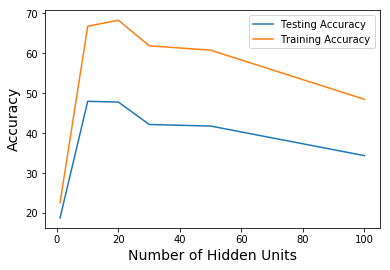

In [8]:
nhs=[1,10,20,30,50,100]
accuracy=[]
accuracy_train=[]
for i in nhs:
    architecture = [784,i,10]
    network = NeuralNetwork(architecture, 'logistic')
    cost_func = network.fit(x_Train, y_vec_train, 2000, alpha=10)
    print('Number of Hidden Structures:',i)
    x_pred = network.predict(x_Train)
    accuracy_train.append(accuracy_score(y_Train, x_pred) * 100)
    print('Prediction accuracy for Training is {}%'.format(accuracy_score(y_Train, x_pred) * 100))
    y_pred = network.predict(x_Test)
    accuracy.append(accuracy_score(y_Test, y_pred) * 100)
    print('Prediction accuracy for Testing is {}%'.format(accuracy_score(y_Test, y_pred) * 100))
plt.plot(nhs,accuracy,label='Testing Accuracy')
plt.plot(nhs,accuracy_train,label='Training Accuracy')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Accuracy')
plt.legend()

Starting gradient descent for 100 iterations
Number of Epochs: 100
Prediction accuracy for Training is 25.3%
Prediction accuracy for Testing is 21.0%
Starting gradient descent for 500 iterations
Number of Epochs: 500
Prediction accuracy for Training is 52.7%
Prediction accuracy for Testing is 39.0%
Starting gradient descent for 1000 iterations
Number of Epochs: 1000
Prediction accuracy for Training is 67.30000000000001%
Prediction accuracy for Testing is 46.6%
Starting gradient descent for 1500 iterations
Number of Epochs: 1500
Prediction accuracy for Training is 73.9%
Prediction accuracy for Testing is 52.800000000000004%
Starting gradient descent for 2000 iterations
Number of Epochs: 2000
Prediction accuracy for Training is 75.3%
Prediction accuracy for Testing is 54.400000000000006%
Starting gradient descent for 2500 iterations
Number of Epochs: 2500
Prediction accuracy for Training is 76.3%
Prediction accuracy for Testing is 54.400000000000006%


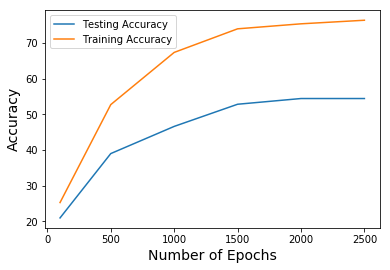

In [10]:
# the NN architecture
architecture = [784, 20, 10]
network = NeuralNetwork(architecture, 'logistic')
numberofepochs = [100,500,1000,1500,2000,2500]
accuracy=[]
accuracy_train=[]
for i in numberofepochs:
    cost_func = network.fit(x_Train, y_vec_train, i, alpha=10)
    print('Number of Epochs:',i)
    x_pred = network.predict(x_Train)
    accuracy_train.append(accuracy_score(y_Train, x_pred) * 100)
    print('Prediction accuracy for Training is {}%'.format(accuracy_score(y_Train, x_pred) * 100))
    y_pred = network.predict(x_Test)
    accuracy.append(accuracy_score(y_Test, y_pred) * 100)
    print('Prediction accuracy for Testing is {}%'.format(accuracy_score(y_Test, y_pred) * 100))
plt.plot(numberofepochs,accuracy,label='Testing Accuracy')
plt.plot(numberofepochs,accuracy_train,label='Training Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()

Starting gradient descent for 2000 iterations
Learning Rate: 0.5
Prediction accuracy for Training is 34.699999999999996%
Prediction accuracy for Testing is 28.199999999999996%
Starting gradient descent for 2000 iterations
Learning Rate: 1
Prediction accuracy for Training is 48.0%
Prediction accuracy for Testing is 34.2%
Starting gradient descent for 2000 iterations
Learning Rate: 2
Prediction accuracy for Training is 55.2%
Prediction accuracy for Testing is 38.4%
Starting gradient descent for 2000 iterations
Learning Rate: 5
Prediction accuracy for Training is 63.2%
Prediction accuracy for Testing is 44.6%
Starting gradient descent for 2000 iterations
Learning Rate: 10
Prediction accuracy for Training is 73.3%
Prediction accuracy for Testing is 51.0%


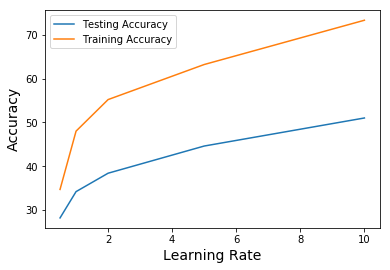

In [24]:
# the NN architecture
architecture = [784, 20, 10]
network = NeuralNetwork(architecture, 'logistic')
learningrate = [0.5,1,2,5,10]
accuracy=[]
accuracy_train=[]
for i in learningrate:
    cost_func = network.fit(x_Train, y_vec_train, 2000, i)
    print('Learning Rate:',i)
    x_pred = network.predict(x_Train)
    accuracy_train.append(accuracy_score(y_Train, x_pred) * 100)
    print('Prediction accuracy for Training is {}%'.format(accuracy_score(y_Train, x_pred) * 100))
    y_pred = network.predict(x_Test)
    accuracy.append(accuracy_score(y_Test, y_pred) * 100)
    print('Prediction accuracy for Testing is {}%'.format(accuracy_score(y_Test, y_pred) * 100))
plt.plot(learningrate,accuracy,label = 'Testing Accuracy')
plt.plot(learningrate,accuracy_train,label = 'Training Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()

## Part 2

Starting gradient descent for 2000 iterations
Number of Hidden Structures: 1 1
Prediction accuracy for Training is 21.8%
Prediction accuracy for Testing is 19.6%
Starting gradient descent for 2000 iterations
Number of Hidden Structures: 10 10
Prediction accuracy for Training is 51.6%
Prediction accuracy for Testing is 38.6%
Starting gradient descent for 2000 iterations
Number of Hidden Structures: 20 20
Prediction accuracy for Training is 58.599999999999994%
Prediction accuracy for Testing is 42.199999999999996%
Starting gradient descent for 2000 iterations
Number of Hidden Structures: 30 30
Prediction accuracy for Training is 31.3%
Prediction accuracy for Testing is 25.4%
Starting gradient descent for 2000 iterations
Number of Hidden Structures: 50 50
Prediction accuracy for Training is 10.0%
Prediction accuracy for Testing is 10.0%


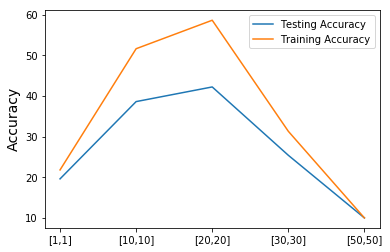

In [53]:
nhs=[[1,1],[10,10],[20,20],[30,30],[50,50]]
accuracy=[]
accuracy_train=[]
for hidden_1,hidden_2 in nhs:
    architecture = [784,hidden_1,hidden_2,10]
    network = NeuralNetwork(architecture, 'logistic')
    cost_func = network.fit(x_Train, y_vec_train, 2000, 10)
    print('Number of Hidden Structures:',hidden_1,hidden_2)
    x_pred = network.predict(x_Train)
    accuracy_train.append(accuracy_score(y_Train, x_pred) * 100)
    print('Prediction accuracy for Training is {}%'.format(accuracy_score(y_Train, x_pred) * 100))
    y_pred = network.predict(x_Test)
    accuracy.append(accuracy_score(y_Test, y_pred) * 100)
    print('Prediction accuracy for Testing is {}%'.format(accuracy_score(y_Test, y_pred) * 100))
fig, ax = plt.subplots()

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
ax.plot(accuracy,label='Testing Accuracy')
ax.plot(accuracy_train,label='Training Accuracy')
ax.set_xticks(np.arange(5))
ax.set_xticklabels(('[1,1]','[10,10]','[20,20]','[30,30]','[50,50]'))
ax.set_ylabel('Accuracy')
ax.legend()

## Part 3

Starting gradient descent for 2000 iterations
Weight Decay: 2e-05
Prediction accuracy for Training is 80.10000000000001%
Prediction accuracy for Testing is 60.4%
Starting gradient descent for 2000 iterations
Weight Decay: 0.0005
Prediction accuracy for Training is 100.0%
Prediction accuracy for Testing is 86.6%
Starting gradient descent for 2000 iterations
Weight Decay: 0.0075
Prediction accuracy for Training is 93.10000000000001%
Prediction accuracy for Testing is 85.39999999999999%
Starting gradient descent for 2000 iterations
Weight Decay: 0.01
Prediction accuracy for Training is 90.9%
Prediction accuracy for Testing is 84.8%
Starting gradient descent for 2000 iterations
Weight Decay: 0.025
Prediction accuracy for Training is 44.0%
Prediction accuracy for Testing is 41.4%


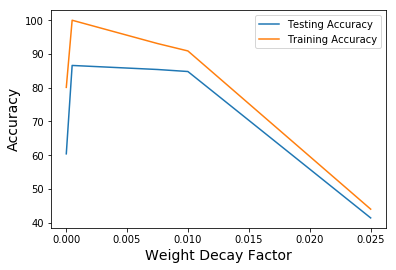

In [13]:
accuracy=[]
accuracy_train=[]
architecture = [784,20,10]
weight_decay=[0.00002, 0.0005, 0.0075, 0.01, 0.025]
network = NeuralNetwork(architecture, 'logistic')
for i in weight_decay:
    cost_func = network.fit(x_Train, y_vec_train, 2000, alpha=10, weightDecay=i)
    print('Weight Decay:',i)
    x_pred = network.predict(x_Train)
    accuracy_train.append(accuracy_score(y_Train, x_pred) * 100)
    print('Prediction accuracy for Training is {}%'.format(accuracy_score(y_Train, x_pred) * 100))
    y_pred = network.predict(x_Test)
    accuracy.append(accuracy_score(y_Test, y_pred) * 100)
    print('Prediction accuracy for Testing is {}%'.format(accuracy_score(y_Test, y_pred) * 100))
plt.plot(weight_decay,accuracy,label='Testing Accuracy')
plt.plot(weight_decay,accuracy_train,label='Training Accuracy')
plt.xlabel('Weight Decay Factor')
plt.ylabel('Accuracy')
plt.legend()

## Part 4

In [89]:
class NeuralNetworkCE :
    def __init__(self, architecture, activation='logistic') :
        self.architecture = architecture
        if activation == 'logistic':
            self.activation = logistic
            self.activation_deriv = logistic_deriv
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv
        elif activation == 'relu':
            self.activation = relu
            self.activation_deriv = relu_deriv
        else :
            raise ValueError('Activation does not match options')
        self.initialize_weights()
    
    def shuffle_set(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
        
    def initialize_weights(self) :
        W = {}
        b = {}
        for l in range(1, len(self.architecture)):
#             W[l] = np.random.random((self.architecture[l], self.architecture[l-1]))
#             b[l] = np.random.random((self.architecture[l],))
            W[l] = np.random.random((self.architecture[l], self.architecture[l-1]))* np.sqrt(1/self.architecture[l-1])
            b[l] = np.random.random((self.architecture[l],))
        self.W, self.b = W, b

    def forward(self, x):
        h = {1: x}
        s = {}
        for l in range(1, len(self.W) + 1):
            s[l+1] = self.W[l].dot(h[l]) + self.b[l]
            h[l+1] = self.activation(s[l+1])
        return h, s
        
    def init_delta_values(self):
        delta_W = {}
        delta_b = {}
        for l in range(1, len(self.architecture)):
            delta_W[l] = np.zeros((self.architecture[l], self.architecture[l-1]))
            delta_b[l] = np.zeros((self.architecture[l],))
        return delta_W, delta_b
    
#     def calculate_output_layer_entropy(self, y, h_out):
#         return -np.sum(y*(np.log(h_out+1e-6)))

    def calculate_output_layer_delta(self, y, h_out, s_out):
        return -(y-h_out) * self.activation_deriv(s_out)
    
    def calculate_output_layer_CE_delta(self, y, h_out, s_out):
        return -(y/(h_out + 1e-6)) * logistic_deriv(s_out)

    def calculate_hidden_delta(self, delta_plus_1, w_l, s_l):
        # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(s^(l))
        return np.dot(np.transpose(w_l), delta_plus_1) * self.activation_deriv(s_l)

    def fit(self, X, y, num_iterations=3000, alpha=0.25, weightDecay=0.000, crossEntropy= False, stochastic=False):
        iterations = 0
        N = len(y)
        #weightDecay=5
        avg_cost_func = []
        #print('Starting gradient descent for {} iterations'.format(num_iterations))
        while iterations < num_iterations :
            #if iterations%100 == 0:
                #print('Iteration {} of {}'.format(iterations, num_iterations))
                #if len(avg_cost_func) > 0 :
                    #print('cost: ', avg_cost_func[-1])
            if stochastic:
                X, y = self.shuffle_set(X,y)
            delta_W, delta_b = self.init_delta_values()
            avg_cost = 0
            for i in range(len(y)):
                delta = {}
                # perform the feed forward pass and return the stored h and z values, to be used in the
                # gradient descent step
                h, s = self.forward(X[i, :])
                # backpropagate the errors
                for l in range(len(self.architecture), 0, -1):
                    if l == len(self.architecture):
                        if crossEntropy is True:
                            delta[l] = self.calculate_output_layer_CE_delta(y[i,:], h[l], s[l])
                        else:
                            delta[l] = self.calculate_output_layer_delta(y[i,:], h[l], s[l])
                        avg_cost += (np.linalg.norm((y[i,:]-h[l])) / N)
                    else:
                        if l > 1:
                            delta[l] = self.calculate_hidden_delta(delta[l+1], self.W[l], s[l])
                        if stochastic:
                            delta_W[l] = (np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis])) + (weightDecay*self.W[l]))
                            delta_b[l] = delta[l+1]
                            self.W[l] += -alpha * delta_W[l]
                            self.b[l] += -alpha * delta_b[l]
                        else:
                            delta_W[l] += (np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis])) + (weightDecay*self.W[l]))
                            delta_b[l] += delta[l+1] 
            if not stochastic:
                # perform the gradient descent step for the weights in each layer
                for l in range(len(self.architecture) - 1, 0, -1):
                    self.W[l] += -alpha * (1.0/N * delta_W[l]) 
                    self.b[l] += -alpha * (1.0/N * delta_b[l])                    
            # complete the average cost calculation
            avg_cost_func.append(avg_cost)
            iterations += 1
        return avg_cost_func

    def predict(self, X):
        N = X.shape[0]
        y = np.zeros((N,))
        for i in range(N):
            h, _ = self.forward(X[i, :])
            y[i] = np.argmax(h[len(self.architecture)])
        return y

    def decision_function(self, X):
        N = X.shape[0]
        scores = np.zeros((N,self.architecture[-1]))
        for i in range(N):
            h, _ = self.forward(X[i, :])
            scores[i]=h[len(self.architecture)]
        return scores


In [20]:
# Logistic Activation Function
# the NN architecture
architecture = [784, 20, 10]
# train the NN
network_logistic = NeuralNetworkCE(architecture, 'logistic')
cost_func = network_logistic.fit(x_Train, y_vec_train, 3000, alpha=10, crossEntropy=True)
x_predict1 = network_logistic.predict(x_Train)
accuracyLogistic1=accuracy_score(y_Train, x_predict1) * 100
#print('Prediction accuracy for Training is {}%'.format(accuracy_score(y_Train, x_predict1) * 100))
y_predict1 = network_logistic.predict(x_Test)
accuracyLogistic2=accuracy_score(y_Test, y_predict1) * 100
#print('Prediction accuracy for Testing is {}%'.format(accuracy_score(y_Test, y_predict1) * 100))

# ReLU Activation Function
architecture = [784, 20, 10]
network_relu = NeuralNetworkCE(architecture, 'relu')
cost_func = network_relu.fit(x_Train, y_vec_train, 3000, alpha=10, crossEntropy=True)
x_predict2 = network_relu.predict(x_Train)
accuracyRelu1=accuracy_score(y_Train, x_predict2) * 100
#print('Prediction accuracy for Training is {}%'.format(accuracy_score(y_Train, x_predict2) * 100))
y_predict2 = network_relu.predict(x_Test)
accuracyRelu2=accuracy_score(y_Test, y_predict2) * 100
#print('Prediction accuracy for Testing is {}%'.format(accuracy_score(y_Test, y_predict2) * 100))

# To display in tabulated format
titles = ['Training Accuracy', 'Testing Accuracy']
Logistic_Accuracy = pd.Series([accuracyLogistic1,
                            accuracyLogistic2],
                            index=titles)
Relu_Accuracy = pd.Series([accuracyRelu1,
                            accuracyRelu2],
                            index=titles)
d = {'Logistic Activation' : Logistic_Accuracy, 'ReLU Activation' : Relu_Accuracy}
dataframe = pd.DataFrame(d)
dataframe

,Logistic Activation,ReLU Activation
Training Accuracy,42.9,57.3
Testing Accuracy,38.6,52.0


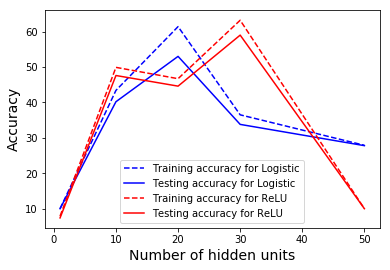

In [88]:
# Logistic Activation Function
nhs=[1,10,20,30,50]
accuracyLogistic1=[]
accuracyLogistic2=[]
# train the NN
for i in nhs:
    architecture = [784, i, 10]
    network_logistic = NeuralNetworkCE(architecture, 'logistic')
    cost_func = network_logistic.fit(x_Train, y_vec_train, 2000, alpha=10, crossEntropy=True)
    x_predict1 = network_logistic.predict(x_Train)
    accuracyLogistic1.append(accuracy_score(y_Train, x_predict1) * 100)
    #print('Prediction accuracy for Training is {}%'.format(accuracy_score(y_Train, x_predict1) * 100))
    y_predict1 = network_logistic.predict(x_Test)
    accuracyLogistic2.append(accuracy_score(y_Test, y_predict1) * 100)
    #print('Prediction accuracy for Testing is {}%'.format(accuracy_score(y_Test, y_predict1) * 100))

# ReLU Activation Function
accuracyRelu1=[]
accuracyRelu2=[]
for i in nhs:
    architecture = [784, i, 10]
    network_relu = NeuralNetworkCE(architecture, 'relu')
    cost_func = network_relu.fit(x_Train, y_vec_train, 2000, alpha=10, crossEntropy=True)
    x_predict2 = network_relu.predict(x_Train)
    accuracyRelu1.append(accuracy_score(y_Train, x_predict2) * 100)
    #print('Prediction accuracy for Training is {}%'.format(accuracy_score(y_Train, x_predict2) * 100))
    y_predict2 = network_relu.predict(x_Test)
    accuracyRelu2.append(accuracy_score(y_Test, y_predict2) * 100)
    #print('Prediction accuracy for Testing is {}%'.format(accuracy_score(y_Test, y_predict2) * 100))

plt.plot(nhs,accuracyLogistic1,color='blue',linestyle='dashed',label='Training accuracy for Logistic')
plt.plot(nhs,accuracyLogistic2,color='blue',label='Testing accuracy for Logistic')
plt.plot(nhs,accuracyRelu1,color='red',linestyle='dashed',label='Training accuracy for ReLU')
plt.plot(nhs,accuracyRelu2,color='red',label='Testing accuracy for ReLU')
plt.xlabel('Number of hidden units')
plt.ylabel('Accuracy')
plt.legend()

## Part 5

Starting gradient descent for 100 iterations
Starting gradient descent for 500 iterations
Starting gradient descent for 1000 iterations
Starting gradient descent for 1500 iterations
Starting gradient descent for 2000 iterations
Starting gradient descent for 2500 iterations
Starting Stochastic gradient descent for 100 iterations
Starting Stochastic gradient descent for 500 iterations
Starting Stochastic gradient descent for 1000 iterations
Starting Stochastic gradient descent for 1500 iterations
Starting Stochastic gradient descent for 2000 iterations
Starting Stochastic gradient descent for 2500 iterations


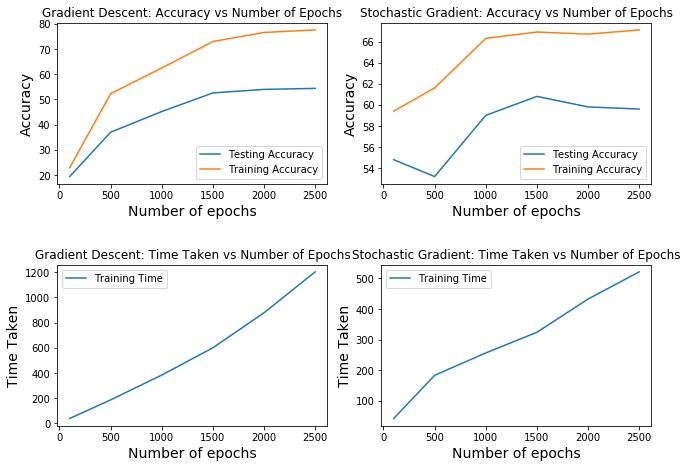

In [30]:
f,axarr = plt.subplots(2,2)
plt.subplots_adjust(left=0.125, bottom=0.1, right=1.5, top=1.5,hspace=0.5,wspace=0.2)

# Batch Gradient Descent
# the NN architecture
architecture = [784, 30, 10]
# train the NN
network = NeuralNetwork(architecture, 'logistic')
numberofepochs = [100,500,1000,1500,2000,2500]
trainAccuracyG=[]
testAccuracyG=[]
timeTakenG=[]
for i in numberofepochs:
    startTime=time.time()
    cost_func = network.fit(x_Train, y_vec_train, i, alpha=10,weightDecay= 0, stochastic=False)
    endTime=time.time()
    timeTakenG.append(endTime-startTime)
    x_pred = network.predict(x_Train)
    trainAccuracyG.append(accuracy_score(y_Train, x_pred) * 100)
    y_pred = network.predict(x_Test)
    testAccuracyG.append(accuracy_score(y_Test, y_pred) * 100)

axarr[0][0].set_title('Gradient Descent: Accuracy vs Number of Epochs')
axarr[0][0].plot(numberofepochs,testAccuracyG,label='Testing Accuracy')
axarr[0][0].plot(numberofepochs,trainAccuracyG,label='Training Accuracy')
axarr[0][0].set_xlabel('Number of epochs')
axarr[0][0].set_ylabel('Accuracy')
axarr[0][0].legend()

axarr[1][0].set_title('Gradient Descent: Time Taken vs Number of Epochs')
axarr[1][0].plot(numberofepochs,timeTakenG,label='Training Time')
axarr[1][0].set_xlabel('Number of epochs')
axarr[1][0].set_ylabel('Time Taken')
axarr[1][0].legend()


# Stochastic Gradient Descent
# the NN architecture
architecture = [784, 30, 10]
# train the NN
network_stochastic = NeuralNetwork(architecture, 'logistic')
numberofepochs = [100,500,1000,1500,2000,2500]
trainAccuracyS=[]
testAccuracyS=[]
timeTakenS=[]
for i in numberofepochs:
    startTime=time.time()
    cost_func = network_stochastic.fit(x_Train, y_vec_train, i, alpha=10, stochastic=True)
    endTime=time.time()
    timeTakenS.append(endTime-startTime)
    x_preds = network_stochastic.predict(x_Train)
    trainAccuracyS.append(accuracy_score(y_Train, x_preds) * 100)
    y_preds = network_stochastic.predict(x_Test)
    testAccuracyS.append(accuracy_score(y_Test, y_preds) * 100)
    
axarr[0][1].set_title('Stochastic Gradient: Accuracy vs Number of Epochs')
axarr[0][1].plot(numberofepochs,testAccuracyS,label='Testing Accuracy')
axarr[0][1].plot(numberofepochs,trainAccuracyS,label='Training Accuracy')
axarr[0][1].set_xlabel('Number of epochs')
axarr[0][1].set_ylabel('Accuracy')
axarr[0][1].legend()

axarr[1][1].set_title('Stochastic Gradient: Time Taken vs Number of Epochs')
axarr[1][1].plot(numberofepochs,timeTakenS,label='Training Time')
axarr[1][1].set_xlabel('Number of epochs')
axarr[1][1].set_ylabel('Time Taken')
axarr[1][1].legend()    


Starting gradient descent for 100 iterations
Starting gradient descent for 500 iterations
Starting gradient descent for 1000 iterations
Starting gradient descent for 1500 iterations
Starting gradient descent for 2000 iterations
Starting Stochastic gradient descent for 100 iterations
Starting Stochastic gradient descent for 500 iterations
Starting Stochastic gradient descent for 1000 iterations
Starting Stochastic gradient descent for 1500 iterations
Starting Stochastic gradient descent for 2000 iterations


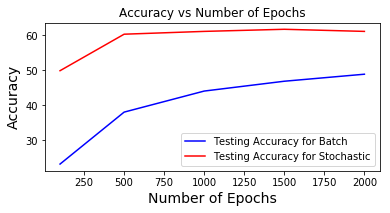

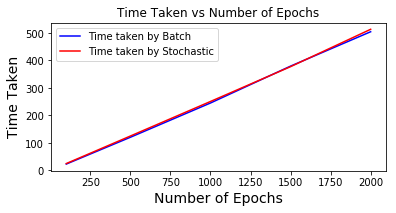

In [86]:
# Batch Gradient Descent
# the NN architecture
architecture = [784, 30, 10]
# train the NN
network = NeuralNetwork(architecture, 'logistic')
numberofepochs = [100,500,1000,1500,2000]
trainAccuracyG=[]
testAccuracyG=[]
timeTakenG=[]
for i in numberofepochs:
    startTime=time.time()
    cost_func = network.fit(x_Train, y_vec_train, i, alpha=10,weightDecay= 0, stochastic=False)
    endTime=time.time()
    timeTakenG.append(endTime-startTime)
    x_pred = network.predict(x_Train)
    trainAccuracyG.append(accuracy_score(y_Train, x_pred) * 100)
    y_pred = network.predict(x_Test)
    testAccuracyG.append(accuracy_score(y_Test, y_pred) * 100)

# Stochastic Gradient Descent    
# the NN architecture
architecture = [784, 30, 10]
# train the NN
network_stochastic = NeuralNetwork(architecture, 'logistic')
numberofepochs = [100,500,1000,1500,2000]
trainAccuracyS=[]
testAccuracyS=[]
timeTakenS=[]
for i in numberofepochs:
    startTime=time.time()
    cost_func = network_stochastic.fit(x_Train, y_vec_train, i, alpha=10, stochastic=True)
    endTime=time.time()
    timeTakenS.append(endTime-startTime)
    x_preds = network_stochastic.predict(x_Train)
    trainAccuracyS.append(accuracy_score(y_Train, x_preds) * 100)
    y_preds = network_stochastic.predict(x_Test)
    testAccuracyS.append(accuracy_score(y_Test, y_preds) * 100)

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(numberofepochs,testAccuracyG,color='blue',label='Testing Accuracy for Batch')
plt.plot(numberofepochs,testAccuracyS,color='red',label='Testing Accuracy for Stochastic')
plt.title('Accuracy vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 2)
plt.plot(numberofepochs,timeTakenG,color='blue',label='Time taken by Batch')
plt.plot(numberofepochs,timeTakenS,color='red',label='Time taken by Stochastic')
plt.title('Time Taken vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Time Taken')
plt.legend(loc='best')

## Using Xavier's Weight Initialization

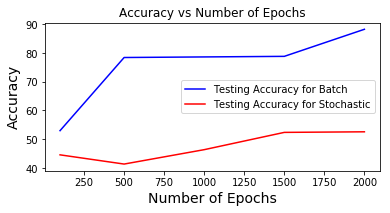

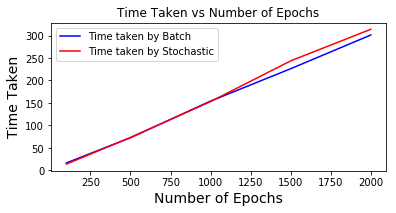

In [90]:
# Batch Gradient Descent
# the NN architecture
architecture = [784, 30, 10]
# train the NN
network = NeuralNetworkCE(architecture, 'logistic')
numberofepochs = [100,500,1000,1500,2000]
trainAccuracyG=[]
testAccuracyG=[]
timeTakenG=[]
for i in numberofepochs:
    startTime=time.time()
    cost_func = network.fit(x_Train, y_vec_train, i, alpha=10,weightDecay= 0, stochastic=False)
    endTime=time.time()
    timeTakenG.append(endTime-startTime)
    x_pred = network.predict(x_Train)
    trainAccuracyG.append(accuracy_score(y_Train, x_pred) * 100)
    y_pred = network.predict(x_Test)
    testAccuracyG.append(accuracy_score(y_Test, y_pred) * 100)

# Stochastic Gradient Descent    
# the NN architecture
architecture = [784, 30, 10]
# train the NN
network_stochastic = NeuralNetworkCE(architecture, 'logistic')
numberofepochs = [100,500,1000,1500,2000]
trainAccuracyS=[]
testAccuracyS=[]
timeTakenS=[]
for i in numberofepochs:
    startTime=time.time()
    cost_func = network_stochastic.fit(x_Train, y_vec_train, i, alpha=10, stochastic=True)
    endTime=time.time()
    timeTakenS.append(endTime-startTime)
    x_preds = network_stochastic.predict(x_Train)
    trainAccuracyS.append(accuracy_score(y_Train, x_preds) * 100)
    y_preds = network_stochastic.predict(x_Test)
    testAccuracyS.append(accuracy_score(y_Test, y_preds) * 100)

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(numberofepochs,testAccuracyG,color='blue',label='Testing Accuracy for Batch')
plt.plot(numberofepochs,testAccuracyS,color='red',label='Testing Accuracy for Stochastic')
plt.title('Accuracy vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 2)
plt.plot(numberofepochs,timeTakenG,color='blue',label='Time taken by Batch')
plt.plot(numberofepochs,timeTakenS,color='red',label='Time taken by Stochastic')
plt.title('Time Taken vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Time Taken')
plt.legend(loc='best')

### Your Report

Answer the questions in the cells reserved for that purpose.

Mathematical equations should be written as LaTex equations; the assignment contains multiple examples of both inline formulas (such as the one exemplifying the notation for the norm of a vector $||\mathbf{x}||$ and those that appear on separate lines, e.g.:

$$
||\mathbf{x}|| = \sqrt{\mathbf{x}^T \mathbf{x}}.
$$



### Submission

Submit your report as a Jupyter notebook via Canvas.  Running the notebook should generate all the plots and results in your notebook.


### Grading 

Here is what the grade sheet will look like for this assignment.  A few general guidelines for this and future assignments in the course:

  * Your answers should be concise and to the point.  We will take off points if that is not the case.
  * Always provide a description of the method you used to produce a given result in sufficient detail such that the reader can reproduce your results on the basis of the description.  You can use a few lines of python code or pseudo-code.


Grading sheet for the assignment:

```
Neural networks.
(15 points):  Exploration of a network with a single hidden layer
(15 points):  Exploration of a network with two hidden layers
(15 points):  Regularization
(20 points):  Cross-entropy
(20 points):  Stochastic gradient descent
(15 points):  Linear activation function for regression
```

Grading will be based on the following criteria:

  * Correctness of answers to math problems
  * Math is formatted as LaTex equations
  * Correct behavior of the required code
  * Easy to understand plots 
  * Overall readability and organization of the notebook
  * Effort in making interesting observations where requested.
  * Conciseness.  Points may be taken off if the notebook is overly 
  